<table border="0" cellpadding="0" cellspacing="0" class="sd_table sd_sortable sd_sortabletable" id="sd_table_239" summary="Tabell">
<thead>
<tr>
<th class="sd_table_rank"><span> </span></th>
<th class="sd_table_team"><span>Lag</span></th>
<th title="Kamper"><span>K</span></th>
<th title="Vunnet"><span>V</span></th>
<th title="Uavgjorte"><span>U</span></th>
<th title="Tapte"><span>T</span></th>
<th title="Mål for"><span>+</span></th>
<th title="Mål mot"><span>-</span></th>
<th title="Målforskjell"><span>+/-</span></th>
<th class="sd_table_points" title="Poeng"><span>P</span></th>
<th class="sd_left">Siste Kamper</th>
</tr>
</thead>
<tbody>
<tr class="sd_table_up sd_odd">
<td class="sd_table_new">1.</td>
<td class="sd_table_team">
<a href="element.do?cmd=team&amp;teamId=944&amp;tournamentId=239&amp;seasonId=341&amp;useFullUrl=false">Bayern</a></td>
<td>34</td>
<td>26</td>
<td>4</td>
<td>4</td>
<td>100</td>
<td>32</td>
<td>+68</td>
<td class="sd_table_points">82</td>
<td class="sd_left" s

ModuleNotFoundError: No module named 'statsmodels.regression'

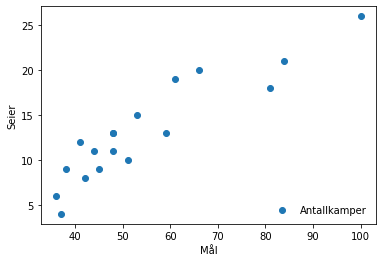

In [6]:
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import requests
import numpy as np

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.altomfotball.no/element.do?cmd=tournamentTable&tournamentId=239&seasonId=341&useFullUrl=false')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])


def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('bundesliga.csv',table)

import pandas as pd
g = pd.read_csv('bundesliga.csv', delimiter=';', encoding='latin1')

g

from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Seier')
ax.set_xlabel('Mål')

#plotting the function:
ax.scatter(g['+'], g['V'],  label='Antallkamper')
ax.legend(loc='lower right',frameon=False)

y=g['V']
pd.DataFrame(y)

x=pd.DataFrame(np.log(g['+']))
x['intercept']=1
x

from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

res.params

fig,ax=plt.subplots()

x=np.linspace(min(np.log(g['V'])), max(np.log(g['+'])), 50)


regression_line=res.params['intercept']+res.params['+']*x


ax.plot(x, regression_line,color='red')

#adding axis lables:
ax.set_ylabel('Seier')
ax.set_xlabel('Mål')



#plotting the function:
ax.scatter(np.log(g['+']), g['V'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)

#Hentet en tabell for bundesliga 2020 og gjort en analyse for å se om påstanden om at man skårer mer mål, vinner man også flere kamper. Etter å ha endret på formen 
#kan vi nå se regrisjonsanalysen. Her ser vi at det er en korelasjon mellom antall mål lagene skårer, men at det ikke alltid stemmer